In [156]:
import pandas as pd
import matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
from pmdarima import auto_arima
import statsmodels.api as sm

In [157]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [158]:
data = pd.read_csv("C:\\Users\\Bruger\\Downloads\\AirPassengers.csv", index_col = "Month")
data.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [159]:
data.index = pd.to_datetime(data.index)  
data = data.asfreq('MS')  

In [160]:
data.shape

(144, 1)

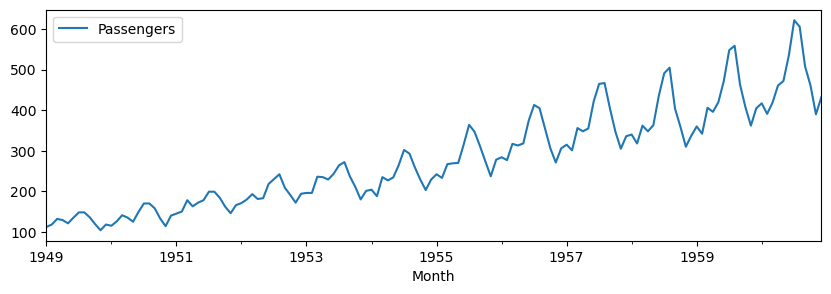

In [161]:
matplotlib.rcParams['figure.figsize'] = [10, 3]
data.plot()
pyplot.show()

In [162]:
acf_value = acf(data.Passengers)
acf_value

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376])

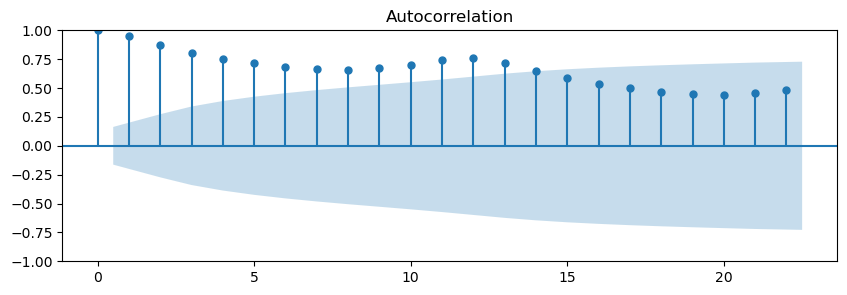

In [163]:
matplotlib.rcParams['figure.figsize'] = [10, 3]
plot_acf(data.Passengers)
pyplot.show()

In [164]:
pacf_value = pacf(data.Passengers, nlags = 3)
pacf_value

array([ 1.        ,  0.95467704, -0.26527732,  0.05546955])

C:\Users\Bruger\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


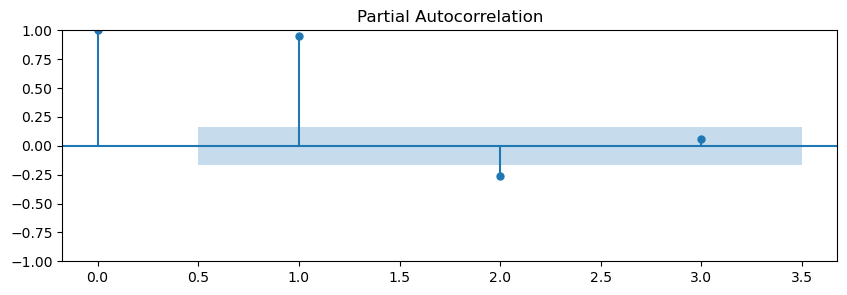

In [165]:
plot_pacf(data.Passengers, lags =3)
pyplot.show()

In [166]:
import statsmodels.api as sa

In [167]:
src_data_model = data.Passengers[:129]
model = sa.tsa.ARIMA(src_data_model).fit()

In [168]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  129
Model:                          ARIMA   Log Likelihood                -784.075
Date:                Sat, 05 Aug 2023   AIC                           1572.150
Time:                        16:05:31   BIC                           1577.869
Sample:                    01-01-1949   HQIC                          1574.474
                         - 09-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        259.4961     10.580     24.528      0.000     238.761     280.232
sigma2      1.113e+04   1703.195      6.534      0.000    7790.478    1.45e+04
===================================================================================
Ljung-Box (L1) (Q):                 115.60   Jarque-Bera (JB):                 8.92
Prob(Q):                              0.00   Prob(JB):                         0.01
Heteroskedasticity (H):               1.58   Skew:                             0.63
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [169]:
pred = model.predict(129,140, typ='levels')

<AxesSubplot:xlabel='Month'>

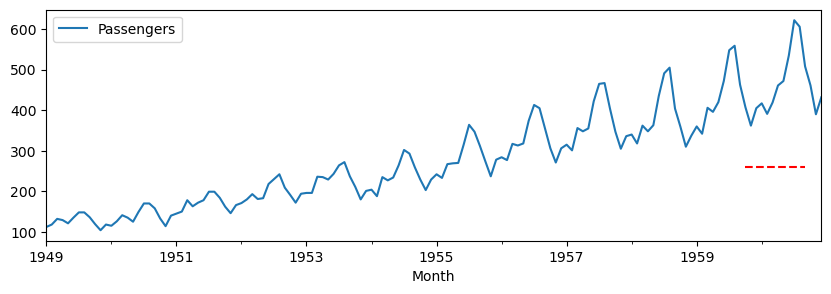

In [170]:
data.plot()
pred.plot(style='r--')

In [171]:
pred

1959-10-01    259.496119
1959-11-01    259.496119
1959-12-01    259.496119
1960-01-01    259.496119
1960-02-01    259.496119
1960-03-01    259.496119
1960-04-01    259.496119
1960-05-01    259.496119
1960-06-01    259.496119
1960-07-01    259.496119
1960-08-01    259.496119
1960-09-01    259.496119
Freq: MS, Name: predicted_mean, dtype: float64

In [172]:
comp = data.Passengers[129:140]
comp

Month
1959-10-01    407
1959-11-01    362
1959-12-01    405
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
Freq: MS, Name: Passengers, dtype: int64

In [173]:
comp = data.Passengers[128:140]

In [174]:
#Через деякі причини в мене не встановлюється пакет ml_metrics, перебпробувала декілька варіантів вирішення - не допомогло. Тому буду використовувати sklean.metrics
mae_value = mean_absolute_error(comp, pred)
mae_value

203.8372140018039

In [175]:
rmse = np.sqrt(mean_squared_error(comp, pred))
rmse

218.99961651619256

In [176]:
train_ratio = 0.9
split_idx = int(len(data) * train_ratio)

In [177]:
train_data = data.iloc[:split_idx]
test_data = data.iloc[split_idx:]

In [178]:
model = auto_arima(train_data, seasonal=True, m=12, trace=True, suppress_warnings=True, error_action='ignore', stepwise=True)
model

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=882.753, Time=2.76 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=991.635, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=883.325, Time=0.54 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=937.545, Time=0.41 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1157.760, Time=0.02 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=883.039, Time=1.08 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=882.879, Time=1.33 sec
 ARIMA(2,0,2)(2,1,1)[12] intercept   : AIC=882.583, Time=3.82 sec
 ARIMA(2,0,2)(2,1,0)[12] intercept   : AIC=883.918, Time=2.31 sec
 ARIMA(2,0,2)(2,1,2)[12] intercept   : AIC=inf, Time=3.27 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=883.226, Time=2.93 sec
 ARIMA(1,0,2)(2,1,1)[12] intercept   : AIC=881.023, Time=2.76 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.50 sec
 ARIMA(1,0,2)(2,1,0)[12] intercept   : AIC=882.557, Time=1.45 sec
 ARIMA(1,0,2)(2,1,2)[12] intercept   : A

ARIMA(order=(2, 0, 3), scoring_args={}, seasonal_order=(1, 1, 2, 12),
      suppress_warnings=True)

In [179]:
model = sa.tsa.statespace.SARIMAX(src_data_model, 
                                  seasonal_order=(1,1,2,12)).fit()

In [180]:
pred = model.predict(129,140, typ='levels')

<AxesSubplot:xlabel='Month'>

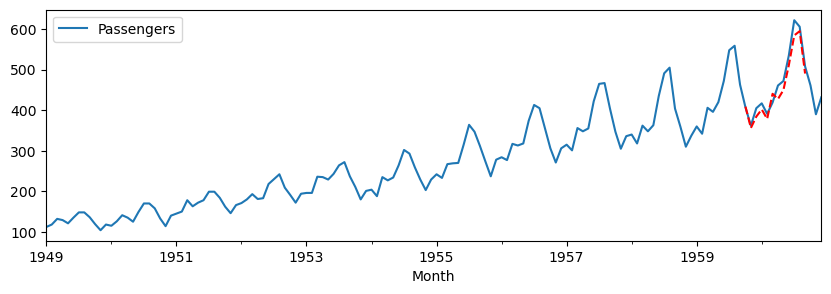

In [181]:
data.plot()
pred.plot(style='r--')

In [182]:
mae_value = mean_absolute_error(comp, pred)
mae_value

39.09118052879132

In [183]:
rmse = np.sqrt(mean_squared_error(comp, pred))
rmse

48.46815677080089

In [184]:
mod = sm.tsa.statespace.SARIMAX(train_data,
                                order=(2, 0, 3),
                                seasonal_order=(1, 1, 2, 12))

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3723      0.338      4.060      0.000       0.710       2.035
ar.L2         -0.3860      0.327     -1.179      0.238      -1.027       0.256
ma.L1         -0.6811      0.358     -1.903      0.057      -1.382       0.020
ma.L2          0.2457      0.136      1.805      0.071      -0.021       0.513
ma.L3         -0.2363      0.116     -2.033      0.042      -0.464      -0.009
ar.S.L12       0.9995      0.060     16.774      0.000       0.883       1.116
ma.S.L12      -1.3123      1.199     -1.095      0.274      -3.662       1.037
ma.S.L24       0.3256      0.388      0.839      0.402      -0.435       1.086
sigma2        82.0262     94.106      0.872      0.383    -102.419     266.471


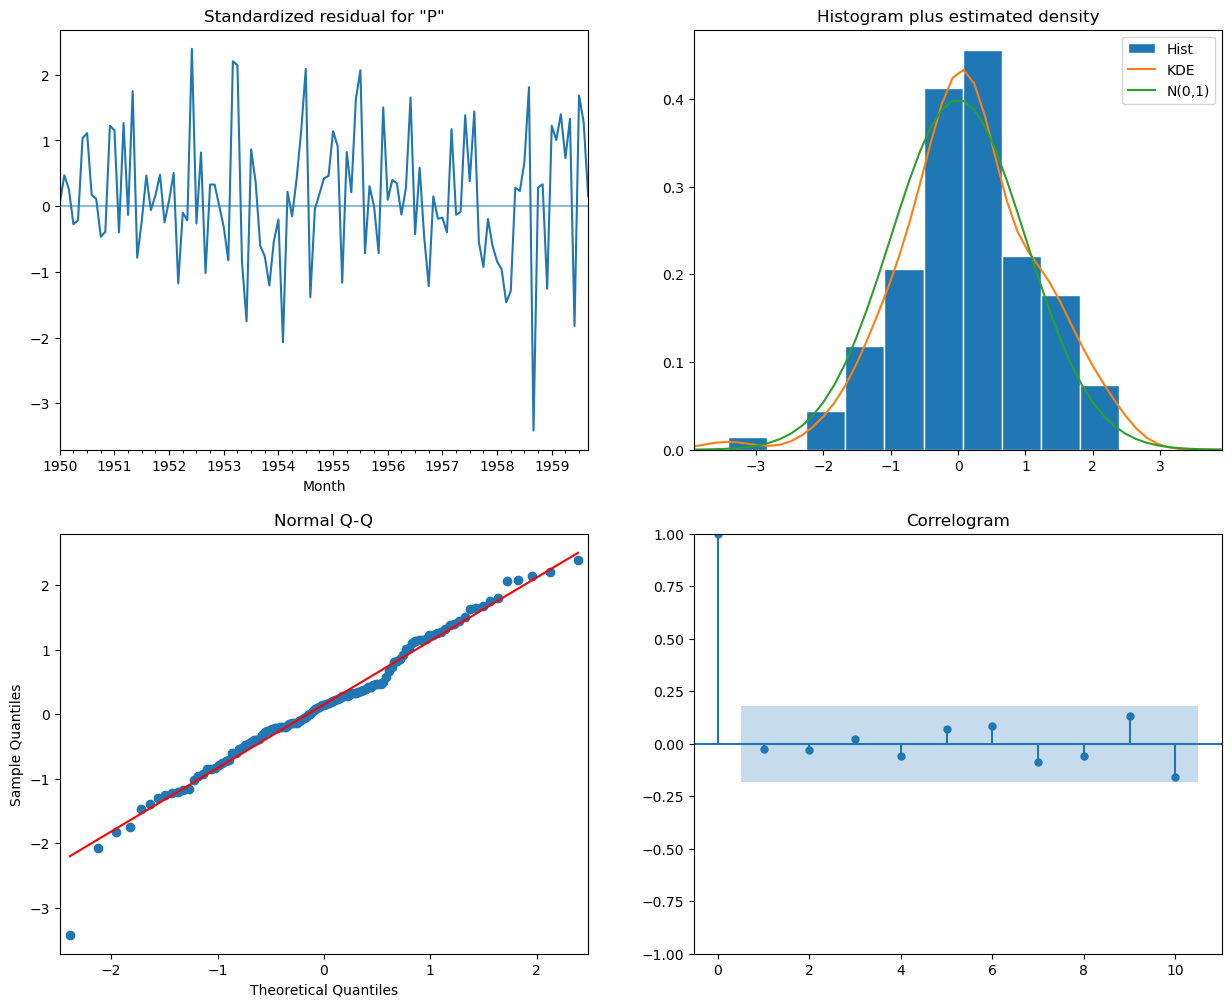

In [185]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [186]:
predict=results.get_prediction()
predict.predicted_mean[128:140]

Month
1959-09-01    461.610169
Freq: MS, Name: predicted_mean, dtype: float64

In [188]:
mae_value = mean_absolute_error(comp, pred)
mae_value

39.09118052879132

In [189]:
rmse = np.sqrt(mean_squared_error(comp, pred))
rmse

48.46815677080089